In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BostonTrain = pd.read_csv('boston_train.csv')

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas   

<Axes: >

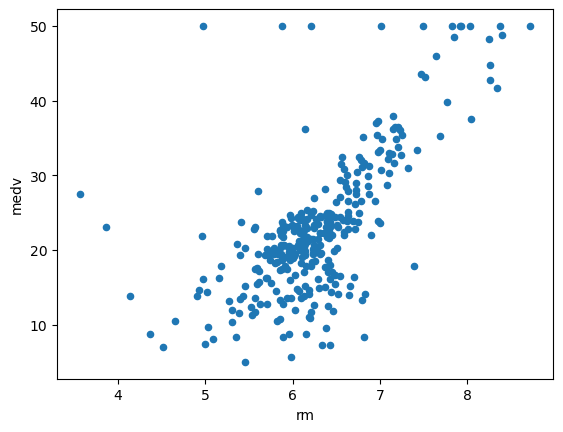

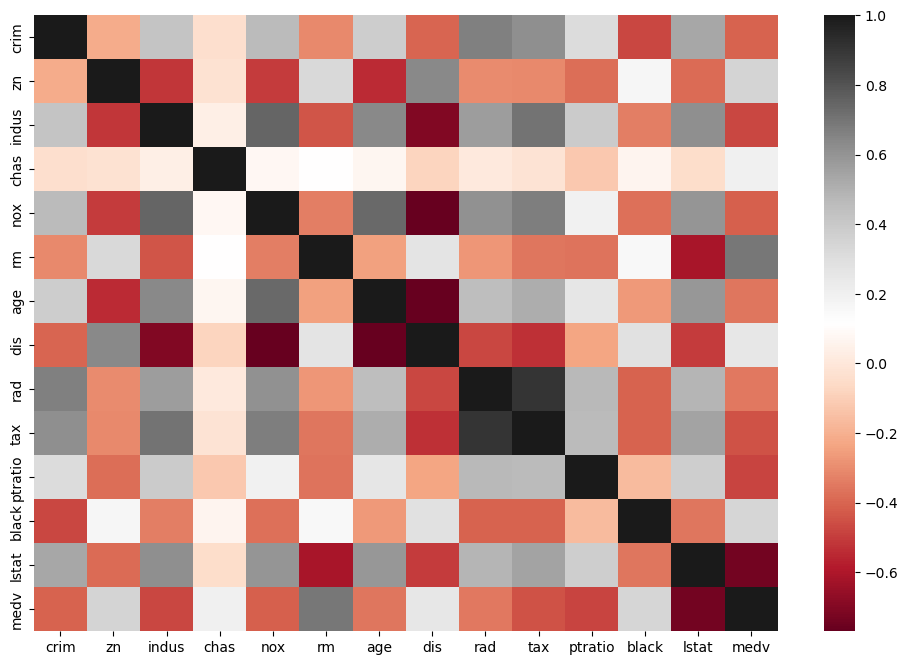

In [4]:
print(BostonTrain.head())
print(BostonTrain.info())
print(BostonTrain.describe())

# Drop irrelevant column
BostonTrain.drop('ID', axis=1, inplace=True)

# Scatter plot
BostonTrain.plot.scatter('rm', 'medv')

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap='RdGy')

C:\Users\jagta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


MAE: 3.371432671700421
MSE: 20.193724321220913
RMSE: 4.4937427965139385


C:\Users\jagta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


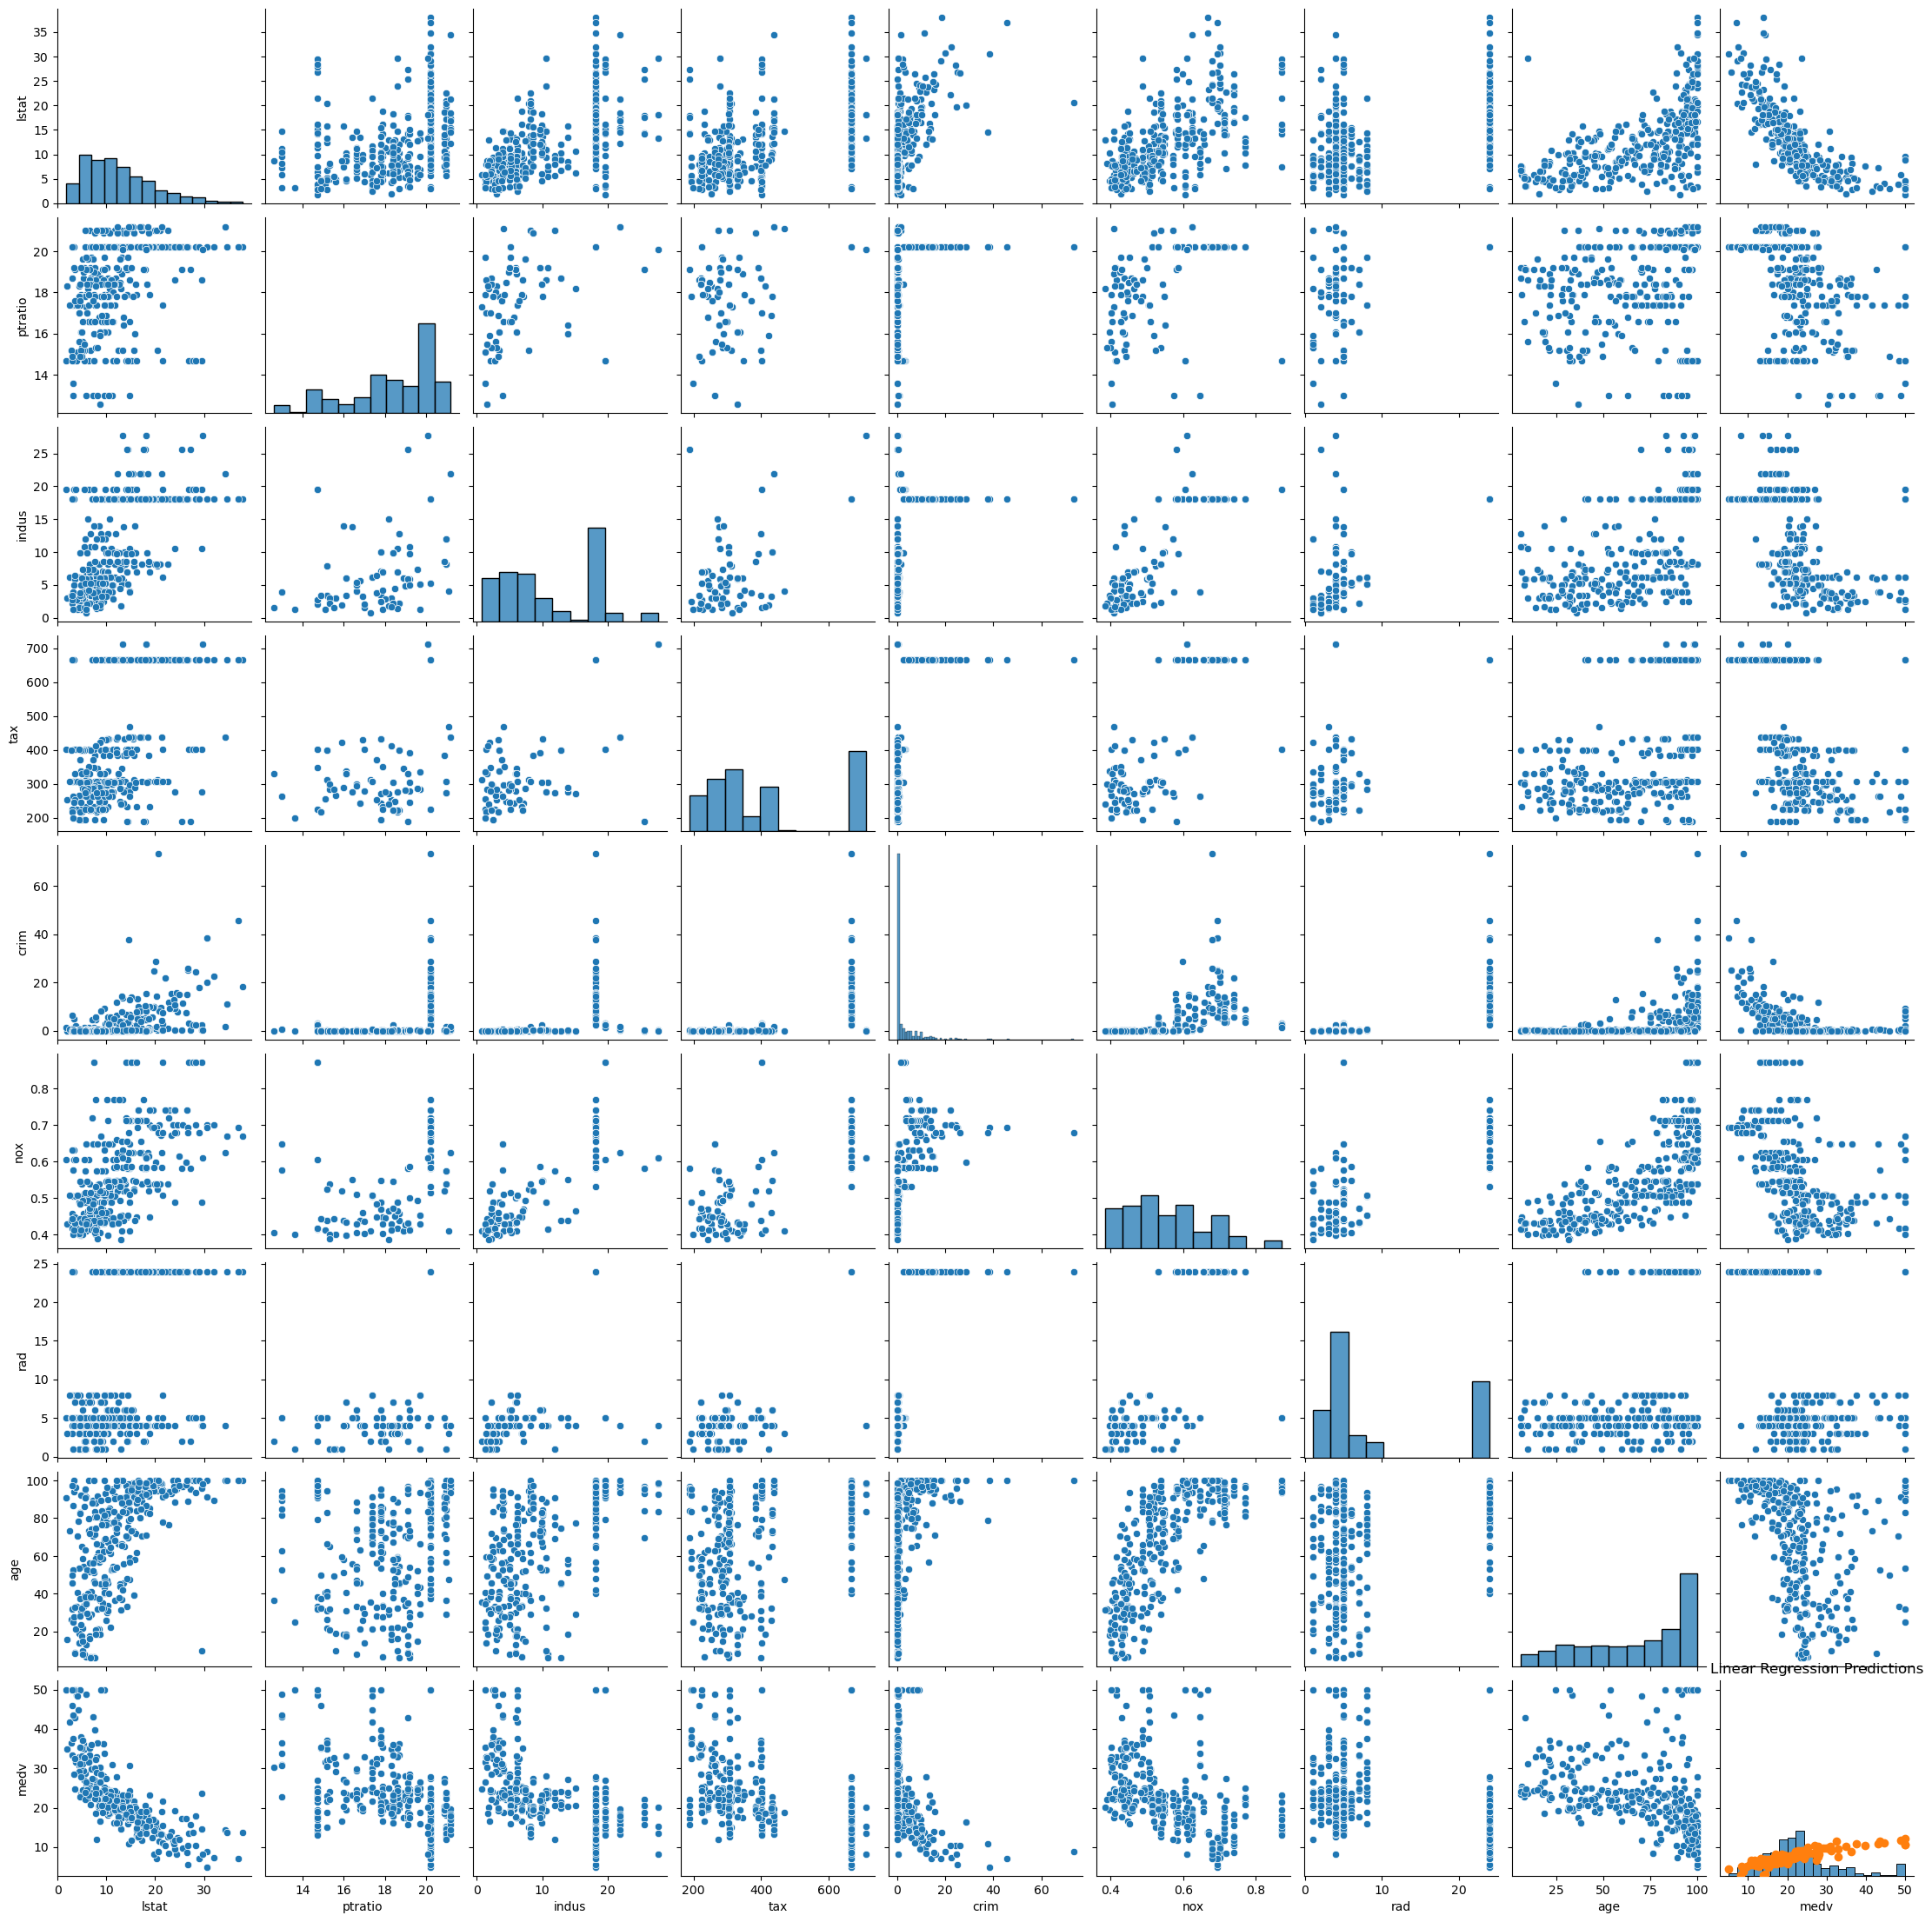

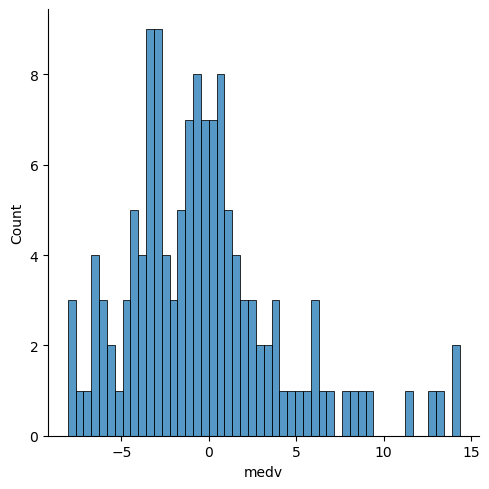

In [5]:
# Pairplot
sns.pairplot(BostonTrain, vars=['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

# Linear Regression Model
X = BostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
                 'ptratio', 'black', 'lstat']]
y = BostonTrain['medv']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Plotting predictions
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Linear Regression Predictions')

# Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Residuals distribution
sns.displot((y_test - predictions), bins=50)

In [6]:
# =================== Neural Networks =======================
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Neural Network
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(13,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(1))


C:\Users\jagta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 660.3222 - mae: 23.7528 - val_loss: 546.4371 - val_mae: 21.1911
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 620.0828 - mae: 22.8296 - val_loss: 519.8452 - val_mae: 20.5424
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 560.4169 - mae: 21.4317 - val_loss: 482.2825 - val_mae: 19.5978
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 520.8406 - mae: 20.5131 - val_loss: 426.3467 - val_mae: 18.1174
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 445.4212 - mae: 18.8768 - val_loss: 343.9701 - val_mae: 15.8034
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 363.0562 - mae: 16.5414 - val_loss: 234.0858 - val_mae: 13.1157
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 215.9407 - mae: 12.3519 - val_loss: 117.7776 - val_mae: 9.2274
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 117.5044 - mae: 8.8105 - val_loss: 35.0921 - val_mae: 5.0570
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━

Text(0.5, 1.0, 'Neural Network Predictions')

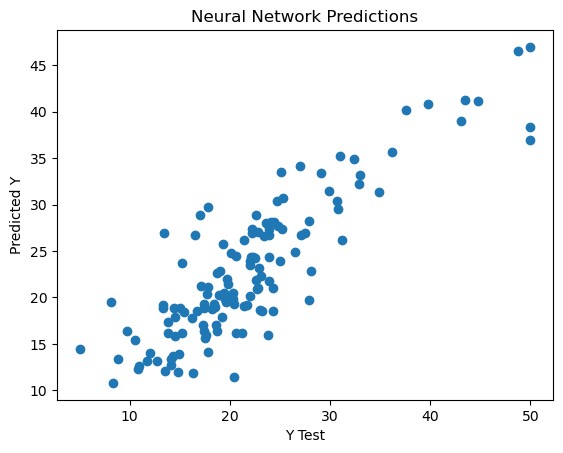

In [9]:
# Train
history = model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.05)

# Predict and evaluate
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean absolute error on test data using NN:', mae_nn)
print('Mean squared error on test data using NN:', mse_nn)
print('RMSE using NN:', np.sqrt(mse_nn))

# Plot predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Neural Network Predictions')